# Imports

In [ ]:
!apt-get install openjdk-8-jdk -y
!wget https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
!tar xf spark-3.5.5-bin-hadoop3.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.5-bin-hadoop3"
import findspark
findspark.init()
from pyspark.sql import SparkSession
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType, LongType
from pyspark.sql.functions import col, when, sum, avg, row_number, to_date
from pyspark.sql.window import Window
spark = SparkSession.builder.appName("Movie Recommender System").getOrCreate()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
openjdk-8-jdk is already the newest version (8u442-b06~us1-0ubuntu1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
--2025-04-22 12:17:14--  https://downloads.apache.org/spark/spark-3.5.5/spark-3.5.5-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.208.237, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.208.237|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400724056 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.5-bin-hadoop3.tgz.2’

spark-3.5.5-bin-had 100%[===================>] 382.16M  61.7MB/s    in 5.5s    

2025-04-22 12:17:20 (69.2 MB/s) - ‘spark-3.5.5-bin-hadoop3.tgz.2’ saved [400724056/400724056]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

folder_path = '/content/drive/MyDrive/ml-latest-small'
files = os.listdir(folder_path)

print(files)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['ml-latest-small']


In [ ]:
!pip install pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.functions import col
from pyspark.sql.functions import explode

In [ ]:
!apt-get update
!apt-get install openjdk-11-jdk -y
!pip install pyspark

import os

os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/usr/local/lib/python3.11/dist-packages/pyspark"

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MovieRecommendationSystem") \
    .getOrCreate()


Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
!pip install dbutils
!pip install mlflow


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

import mlflow
import os
os.environ["PYSPARK_PYTHON"] = "python3"

# Create pyspark session

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("movie analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
movies_df = spark.read.load("/content/drive/MyDrive/ml-latest-small/ml-latest-small/movies.csv", format='csv', header = True)
ratings_df = spark.read.load("/content/drive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv", format='csv', header = True)
links_df = spark.read.load("/content/drive/MyDrive/ml-latest-small/ml-latest-small/links.csv", format='csv', header = True)
tags_df = spark.read.load("/content/drive/MyDrive/ml-latest-small/ml-latest-small/tags.csv", format='csv', header = True)

In [ ]:

movies_df.createOrReplaceTempView("movies_df")
display (spark.sql("SELECT * FROM movies_df limit 5"))

ratings_df.createOrReplaceTempView("ratings_df")
display (spark.sql("SELECT * FROM ratings_df limit 5"))

links_df.show(5)
links_df.createOrReplaceTempView("links_df")
display (spark.sql("SELECT * FROM links_df limit 5"))

tags_df.createOrReplaceTempView("tags_df")
display (spark.sql("SELECT * FROM tags_df limit 5"))


tmp1 = ratings_df.groupBy("userID").count().toPandas()['count'].min()
tmp2 = ratings_df.groupBy("movieId").count().toPandas()['count'].min()
print('For the users that rated movies and the movies that were rated:')
print('Minimum number of ratings per user is {}'.format(tmp1))
print('Minimum number of ratings per movie is {}'.format(tmp2))




DataFrame[movieId: string, title: string, genres: string]

DataFrame[userId: string, movieId: string, rating: string, timestamp: string]

+-------+-------+------+
|movieId| imdbId|tmdbId|
+-------+-------+------+
|      1|0114709|   862|
|      2|0113497|  8844|
|      3|0113228| 15602|
|      4|0114885| 31357|
|      5|0113041| 11862|
+-------+-------+------+
only showing top 5 rows



DataFrame[movieId: string, imdbId: string, tmdbId: string]

DataFrame[userId: string, movieId: string, tag: string, timestamp: string]

For the users that rated movies and the movies that were rated:
Minimum number of ratings per user is 20
Minimum number of ratings per movie is 1


In [ ]:
movies_df.registerTempTable("movies")
ratings_df.registerTempTable("ratings")
links_df.registerTempTable("links")
tags_df.registerTempTable("tags")

/content/spark-3.5.5-bin-hadoop3/python/pyspark/sql/dataframe.py:329: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
num_users = spark.sql("SELECT count (distinct userID) as num_users FROM ratings")
# display(num_users)
ratings_df.createOrReplaceTempView("ratings_df")
# display (spark.sql("SELECT * FROM ratings_df limit 5"))

# Build the model

In [ ]:
movie_ratings=ratings_df.drop('timestamp')


from pyspark.sql.types import IntegerType, FloatType
movie_ratings = movie_ratings.withColumn("userId", movie_ratings["userId"].cast(IntegerType()))
movie_ratings = movie_ratings.withColumn("movieId", movie_ratings["movieId"].cast(IntegerType()))
movie_ratings = movie_ratings.withColumn("rating", movie_ratings["rating"].cast(FloatType()))


movie_ratings.createOrReplaceTempView("movie_ratings")


from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
(training,test)=movie_ratings.randomSplit([0.8,0.2])

als = ALS(maxIter=5, rank=10, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")
print(als.explainParams())

alpha: alpha for implicit preference (default: 1.0)
blockSize: block size for stacking input data in matrices. Data is stacked within partitions. If block size is more than remaining data in a partition then it is adjusted to the size of this data. (default: 4096)
checkpointInterval: set checkpoint interval (>= 1) or disable checkpoint (-1). E.g. 10 means that the cache will get checkpointed every 10 iterations. Note: this setting will be ignored if the checkpoint directory is not set in the SparkContext. (default: 10)
coldStartStrategy: strategy for dealing with unknown or new users/items at prediction time. This may be useful in cross-validation or production scenarios, for handling user/item ids the model has not seen in the training data. Supported values: 'nan', 'drop'. (default: nan, current: drop)
finalStorageLevel: StorageLevel for ALS model factors. (default: MEMORY_AND_DISK)
implicitPrefs: whether to use implicit preference (default: False)
intermediateStorageLevel: StorageLe

In [ ]:
paramGrid = (ParamGridBuilder()
             .addGrid(als.regParam, [0.01])
             .addGrid(als.rank, [10])
             .addGrid(als.maxIter, [15])
             .build())

evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating",
                                predictionCol="prediction")

!pip install flask-ngrok
!pip install pyngrok==4.1.1
!ngrok authtoken ######AUTHTOKEN GOES HERE#####


NGROK_AUTH_TOKEN = "Write AUTH TOKEN HERE"  #  NGROK AUTHTOKEN

import os
import threading
import time
from pyngrok import ngrok, conf
from pyspark.ml.tuning import CrossValidator

cv = CrossValidator(
    estimator=als,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=1
)

cvModel = cv.fit(training)
best_model = cvModel.bestModel

print ("**Best Model**")
print ("Rank: ", best_model)
print (" MaxIter: ", str(best_model._java_obj.parent().getMaxIter()))
print (" RegParam:",  best_model._java_obj.parent().regParam())

NAME:
   authtoken - save authtoken to configuration file

USAGE:
   ngrok authtoken [command options] [arguments...]

DESCRIPTION:
   The authtoken command modifies your configuration file to include
   the specified authtoken. By default, this configuration file is located
   at $HOME/.ngrok2/ngrok.yml

   The ngrok.com service requires that you sign up for an account to use
   many advanced service features. In order to associate your client with
   an account, it must pass a secret token to the ngrok.com service when it
   starts up. Instead of passing this authtoken on every invocation, you may
   use this command to save it into your configuration file so that your
   client always authenticates you properly.

EXAMPLE:
    ngrok authtoken BDZIXnhJt2HNWLXyQ5PM_qCaBq0W2sNFcCa0rfTZd

OPTIONS:
   --config 		save in this config file, default: ~/.ngrok2/ngrok.yml
   --log "false"	path to log file, 'stdout', 'stderr' or 'false'
   --log-format "term"	log record format: 'term', 'logfmt',

In [ ]:
predictions=best_model.transform(test)
rmse = evaluator.evaluate(predictions)

als_best = ALS(maxIter=15, rank=10, regParam=0.01, userCol="userId", itemCol="movieId", ratingCol="rating",
          coldStartStrategy="drop")
model = als_best.fit(training)


predictions.createOrReplaceTempView("predictions")
# display (spark.sql("SELECT * FROM predictions limit 10"))
alldata=best_model.transform(movie_ratings)
rmse = evaluator.evaluate(alldata)
print ("RMSE = "+str(rmse))

alldata.registerTempTable("alldata")

RMSE = 0.6512248464433695


In [ ]:
ratings_df.createOrReplaceTempView("ratings")
spark.sql("SELECT * FROM ratings LIMIT 5").show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
+------+-------+------+---------+



In [ ]:
user_recs = best_model.recommendForAllUsers(10)
user_recs.createOrReplaceTempView("user_recs")
# display (spark.sql("SELECT * FROM user_recs limit 10"))
user_recs.first()
user_recs.registerTempTable("als_recs_temp")
explode_rec = spark.sql('SELECT userId,\
                                explode(recommendations) AS MovieRec\
                                FROM als_recs_temp')

explode_rec.createOrReplaceTempView("explode_rec")
# display (spark.sql("SELECT * FROM explode_rec limit 10"))
fianl_recs = spark.sql("SELECT userId,\
                               movieIds_and_ratings.movieId AS movieId,\
                               movieIds_and_ratings.rating AS prediction\
                               FROM als_recs_temp\
                               LATERAL VIEW explode(recommendations) exploded_table AS movieIds_and_ratings")



fianl_recs.createOrReplaceTempView("fianl_recs")
# display (spark.sql("SELECT * FROM fianl_recs limit 10"))


In [ ]:

final_rec = fianl_recs.join(movie_ratings,['userId','movieId'],'left').filter(movie_ratings.rating.isNull())
final_rec.createOrReplaceTempView("final_rec")

# display (spark.sql("SELECT * FROM final_rec LIMIT 5"))
final_rec.registerTempTable("final_rec")
movies_df.registerTempTable("movies_df")

In [ ]:
final_rec.createOrReplaceTempView("final_rec")
movies_df.createOrReplaceTempView("movies_df")

result = spark.sql("""
SELECT t1.userId,
       t2.title
FROM final_rec t1
LEFT JOIN movies_df t2
ON t1.movieId = t2.movieId
WHERE t1.userId = 575
LIMIT 10
""")

result.show(truncate=False)


+------+------------------------------+
|userId|title                         |
+------+------------------------------+
|575   |Capturing the Friedmans (2003)|
|575   |Now You See Me (2013)         |
|575   |Closer (2004)                 |
|575   |Very Bad Things (1998)        |
|575   |The Interview (2014)          |
|575   |Persuasion (1995)             |
|575   |House of Sand and Fog (2003)  |
|575   |Jersey Girl (2004)            |
|575   |Trekkies (1997)               |
|575   |Peter Pan (2003)              |
+------+------------------------------+



# Plotting

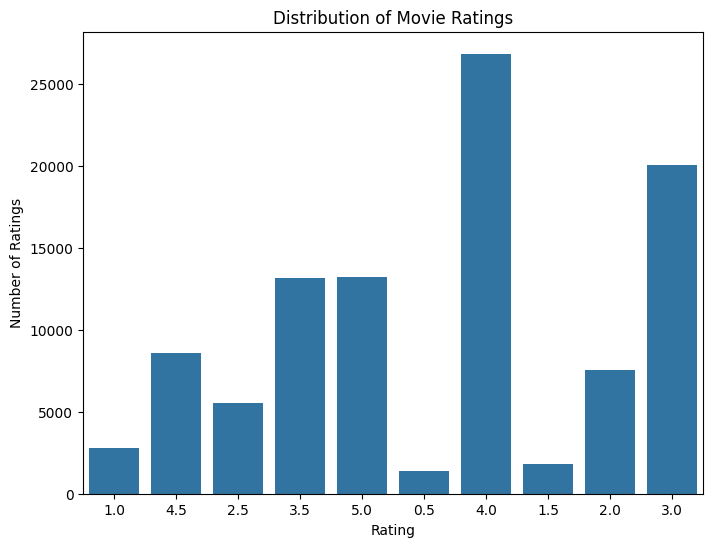

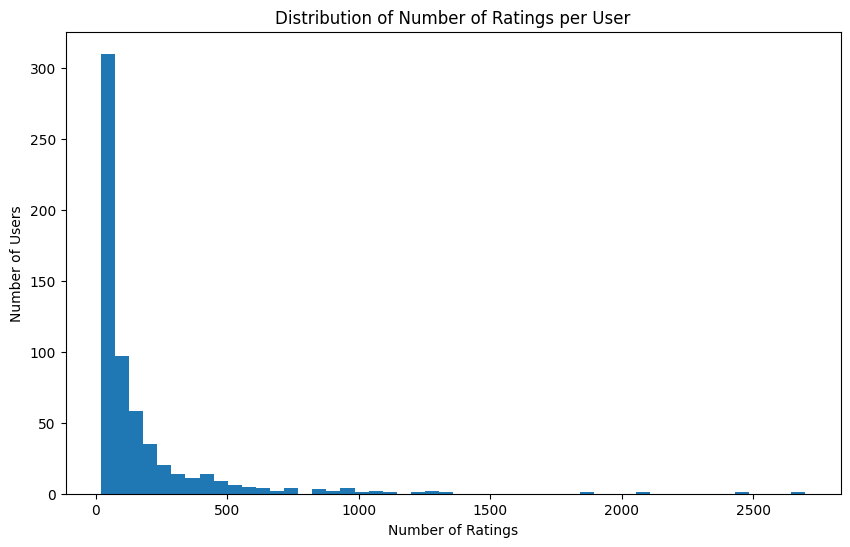

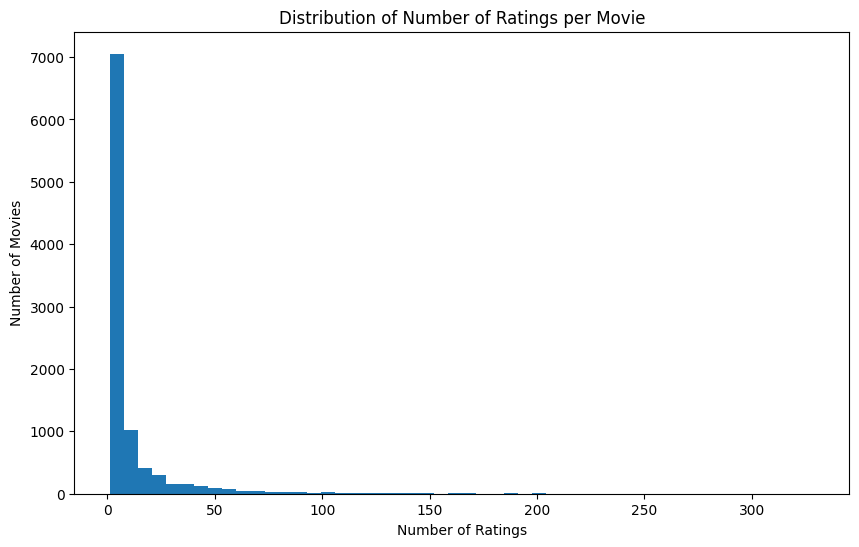

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import count

rating_counts = ratings_df.groupBy("rating").agg(count("*").alias("count")).toPandas()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x="rating", y="count", data=rating_counts)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()


# Calculate the number of ratings per user
user_ratings_count = ratings_df.groupBy("userId").count().toPandas()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(user_ratings_count["count"], bins=50)  # Adjust the number of bins as needed
plt.title("Distribution of Number of Ratings per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()


# Calculate the number of ratings per movie
movie_ratings_count = ratings_df.groupBy("movieId").count().toPandas()

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(movie_ratings_count["count"], bins=50)  # Adjust the number of bins as needed
plt.title("Distribution of Number of Ratings per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()


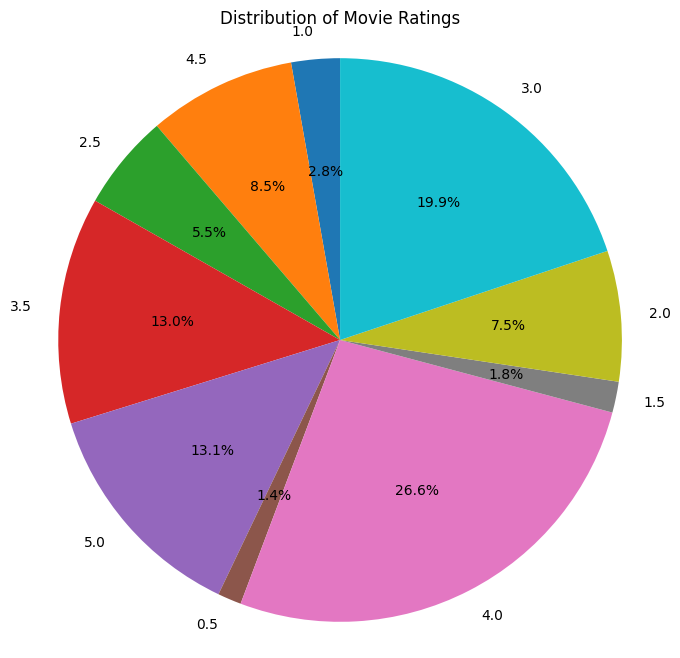

In [ ]:

rating_counts = ratings_df.groupBy("rating").agg(count("*").alias("count")).toPandas()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(rating_counts["count"], labels=rating_counts["rating"], autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Movie Ratings")
plt.axis("equal")
plt.show()


In [ ]:
# from pyspark.sql import SparkSession
# from pyspark.ml.recommendation import ALS
# from pyspark.ml.evaluation import RegressionEvaluator
# from pyspark.sql.functions import col

# # Initialize Spark session
# spark = SparkSession.builder \
#     .appName("MovieRecommendationSystem") \
#     .getOrCreate()

# # Load ratings and movies data
# ratings_df = spark.read.csv("/content/drive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv", header=True, inferSchema=True)
# movies_df = spark.read.csv("/content/drive/MyDrive/ml-latest-small/ml-latest-small/movies.csv", header=True, inferSchema=True)

# # Show schema
# ratings_df.printSchema()

# # Prepare data (drop timestamp)
# ratings = ratings_df.drop("timestamp")

# # Split the data into training and testing
# train_data, test_data = ratings.randomSplit([0.8, 0.2], seed=42)

# # Build ALS collaborative filtering model
# als = ALS(
#     maxIter=10,
#     regParam=0.1,
#     userCol="userId",
#     itemCol="movieId",
#     ratingCol="rating",
#     coldStartStrategy="drop",
#     nonnegative=True
# )

# # Train the model
# model = als.fit(train_data)

# # Evaluate the model on test data
# predictions = model.transform(test_data)

# evaluator = RegressionEvaluator(
#     metricName="rmse",
#     labelCol="rating",
#     predictionCol="prediction"
# )
# rmse = evaluator.evaluate(predictions)
# print(f"Root-mean-square error = {rmse:.4f}")

# # Generate top 10 movie recommendations for each user
# user_recs = model.recommendForAllUsers(10)

# # Show top 10 recommendations for a sample user
# sample_user_id = 1
# user_subset = user_recs.filter(col("userId") == sample_user_id)
# user_subset.show(truncate=False)

# # Optional: Map movieId to movie title
# from pyspark.sql.functions import explode

# recommendations = user_subset.select("userId", explode("recommendations").alias("rec"))
# recommendations = recommendations.select("userId", col("rec.movieId").alias("movieId"), col("rec.rating").alias("score"))

# # Join with movie titles
# recommended_movies = recommendations.join(movies_df, on="movieId").select("title", "score").orderBy("score", ascending=False)
# recommended_movies.show(truncate=False)

# # Stop the Spark session
# spark.stop()


# from pyspark.sql import SparkSession
# from pyspark.ml.recommendation import ALS
# from pyspark.ml.evaluation import RegressionEvaluator
# from pyspark.sql.functions import col

# # Initialize Spark session
# spark = SparkSession.builder \
#     .appName("MovieRecommendationSystem") \
#     .getOrCreate()

# # Load ratings and movies data
# ratings_df = spark.read.csv("/content/drive/MyDrive/ml-latest-small/ml-latest-small/ratings.csv", header=True, inferSchema=True)
# movies_df = spark.read.csv("/content/drive/MyDrive/ml-latest-small/ml-latest-small/movies.csv", header=True, inferSchema=True)

# # Show schema
# ratings_df.printSchema()

# # Prepare data (drop timestamp)
# ratings = ratings_df.drop("timestamp")

# # Split the data into training and testing
# train_data, test_data = ratings.randomSplit([0.8, 0.2], seed=42)

# # Build ALS collaborative filtering model
# als = ALS(
#     maxIter=10,
#     regParam=0.1,
#     userCol="userId",
#     itemCol="movieId",
#     ratingCol="rating",
#     coldStartStrategy="drop",
#     nonnegative=True
# )

# # Train the model
# model = als.fit(train_data)

# # Evaluate the model on test data
# predictions = model.transform(test_data)

# evaluator = RegressionEvaluator(
#     metricName="rmse",
#     labelCol="rating",
#     predictionCol="prediction"
# )
# rmse = evaluator.evaluate(predictions)
# print(f"Root-mean-square error = {rmse:.4f}")

# # Generate top 10 movie recommendations for each user
# user_recs = model.recommendForAllUsers(10)

# # Show top 10 recommendations for a sample user
# sample_user_id = 1
# user_subset = user_recs.filter(col("userId") == sample_user_id)
# user_subset.show(truncate=False)

# # Optional: Map movieId to movie title
# from pyspark.sql.functions import explode

# recommendations = user_subset.select("userId", explode("recommendations").alias("rec"))
# recommendations = recommendations.select("userId", col("rec.movieId").alias("movieId"), col("rec.rating").alias("score"))

# # Join with movie titles
# recommended_movies = recommendations.join(movies_df, on="movieId").select("title", "score").orderBy("score", ascending=False)
# recommended_movies.show(truncate=False)

# # Stop the Spark session
# spark.stop()
